# 折线图绘制 

## pd.to_datetime()转为日期格式

In [1]:
import pandas as pd
unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
print(unrate.head(12))

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


## %matplotlib inline针对jupyter

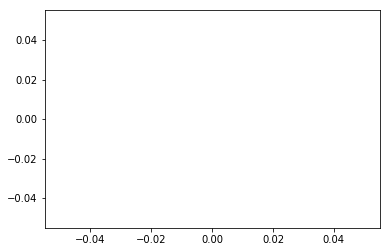

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :
plt.plot()   #plt.plot()画图
plt.show()   #plt.show()显示图

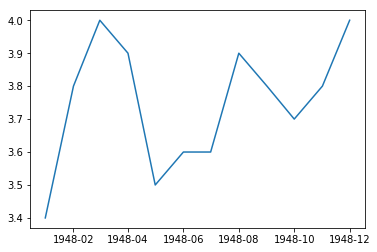

In [5]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.show()

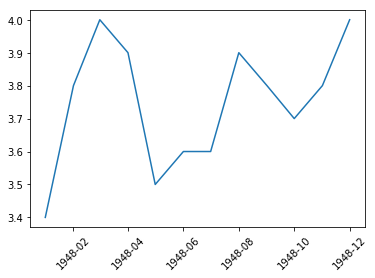

In [6]:
#While the y-axis looks fine, the x-axis tick labels are too close together and are unreadable
#We can rotate the x-axis tick labels by 90 degrees so they don't overlap
#We can specify degrees of rotation using a float or integer value.
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=45)    #指定横坐标变换角度
#print help(plt.xticks)
plt.show()

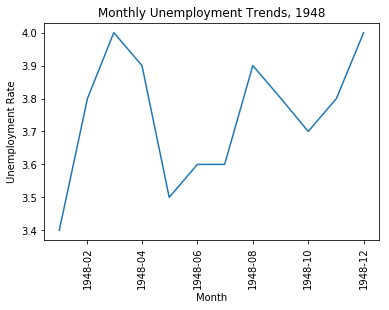

In [7]:
#xlabel(): accepts a string value, which gets set as the x-axis label.
#ylabel(): accepts a string value, which is set as the y-axis label.
#title(): accepts a string value, which is set as the plot title.

plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

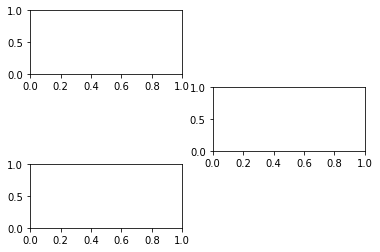

In [11]:
#add_subplot(first,second,index) first means number of Row,second means number of Column.

import matplotlib.pyplot as plt
fig = plt.figure()    #指定画图对象
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,4)
ax3 = fig.add_subplot(3,2,5)
plt.show()

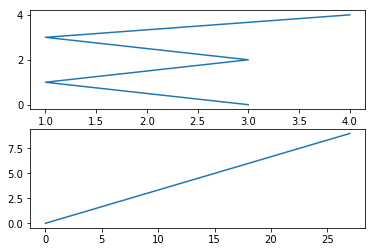

In [15]:
import numpy as np
fig = plt.figure()
#fig = plt.figure(figsize=(3, 3))   #指定figure对象的长和宽
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(np.random.randint(1,5,5), np.arange(5))
ax2.plot(np.arange(10)*3, np.arange(10))
plt.show()

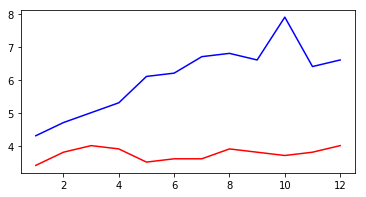

In [23]:
unrate['MONTH'] = unrate['DATE'].dt.month
#print(unrate.head(24))
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

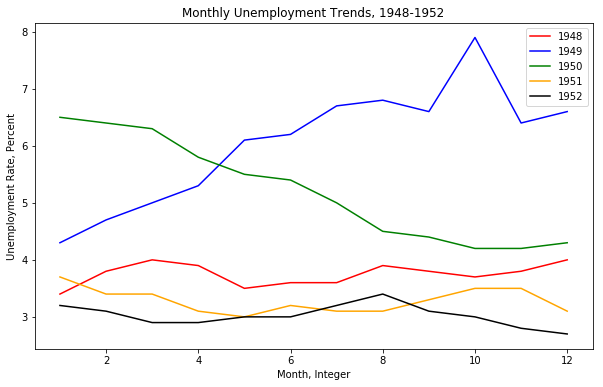

In [29]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i],label = label)

plt.legend(loc='best')    #显示图例
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')

plt.show()

# 条形图与散点图绘制

## fig, ax = plt.subplots()返回值
## fig： matplotlib.figure.Figure 对象
## ax：子图对象（ matplotlib.axes.Axes）或者是他的数组

In [33]:
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')
#print(reviews.head(10))
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


## ax.bar()绘制条形图

[4.3 3.55 3.9 4.5 5.0]
[0.75 1.75 2.75 3.75 4.75]


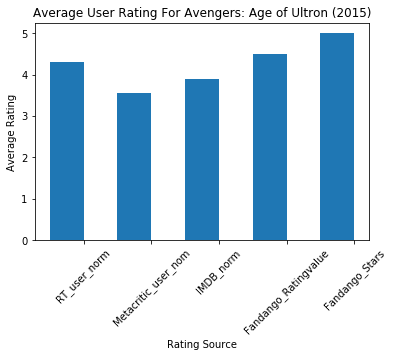

In [47]:
import matplotlib.pyplot as plt
from numpy import arange
#The Axes.bar() method has 2 required parameters, left and height. 
#We use the left parameter to specify the x coordinates of the left sides of the bar. 
#We use the height parameter to specify the height of each bar
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews.loc[0, num_cols].values
print(bar_heights)    #当前柱高度
bar_positions = arange(5) + 0.75
print(bar_positions)  #当前柱位置
tick_positions = range(1,6)   #坐标轴刻度
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=45)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## ax.barh()绘制横向条形图

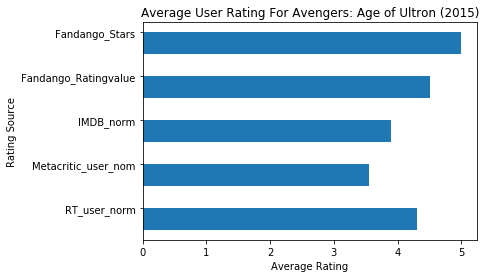

In [49]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews.loc[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)   

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## 散点图

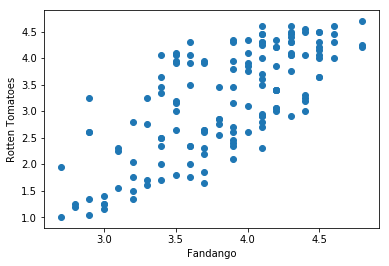

In [50]:
#Let's look at a plot that can help us visualize many points.
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

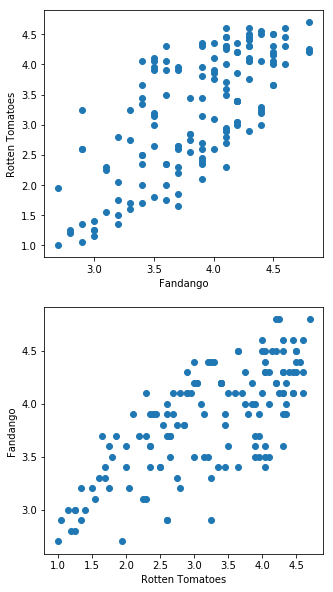

In [51]:
#Switching Axes
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

# 柱形图

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


In [57]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()    #出现次数计数
fandango_distribution = fandango_distribution.sort_index()                     #排序 

imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


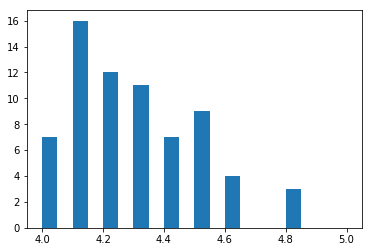

In [66]:
fig, ax = plt.subplots()
#ax.hist(norm_reviews['Fandango_Ratingvalue'])                             #默认bins为10个
#ax.hist(norm_reviews['Fandango_Ratingvalue'],bins=20)                    #指定bins为20个
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(4, 5),bins=20)       #指定区间为4之后
plt.show()

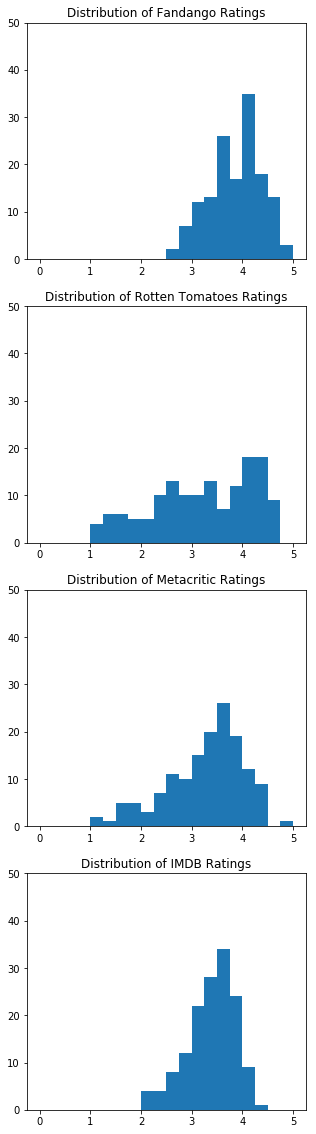

In [69]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

## 箱线图

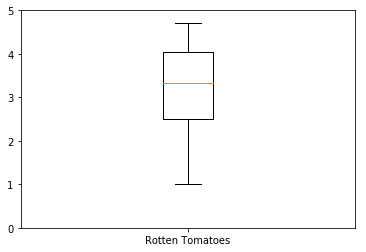

In [70]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

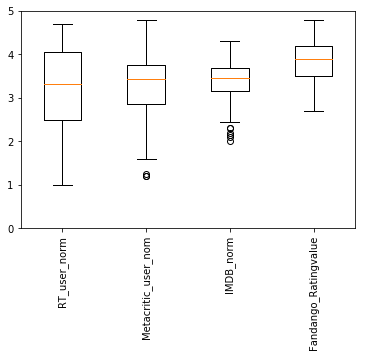

In [71]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()

# 细节设置

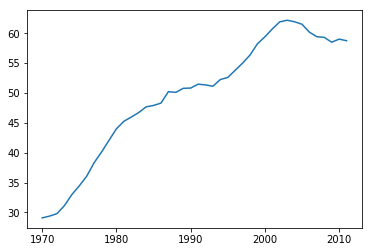

In [73]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

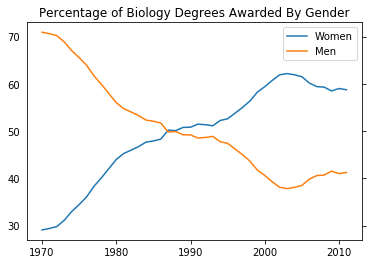

In [77]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')

ax.tick_params(bottom=True, top=False, left=False, right=True)       #设置坐标轴上的齿 
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

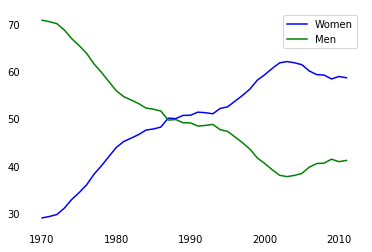

In [79]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)

for key,spine in ax.spines.items():   #遍历坐标轴
    spine.set_visible(False)
# End solution code.
ax.legend(loc='upper right')
plt.show()

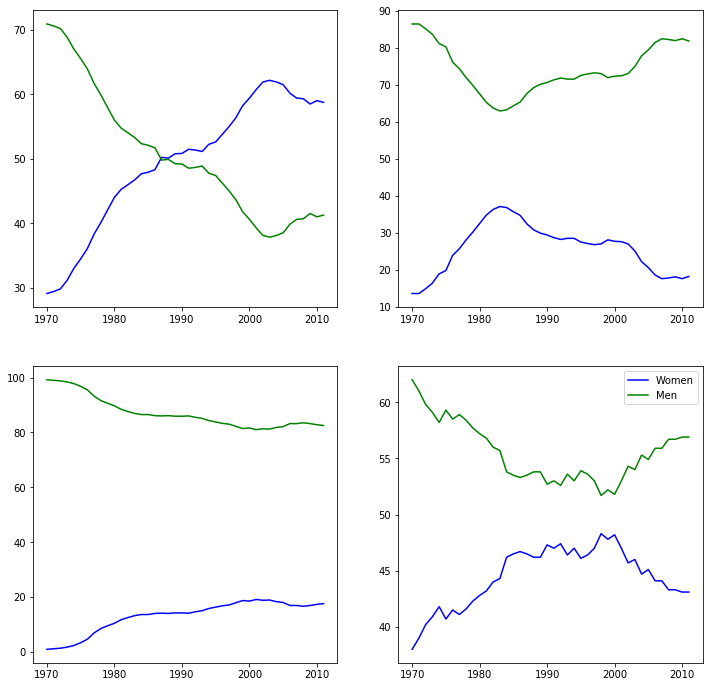

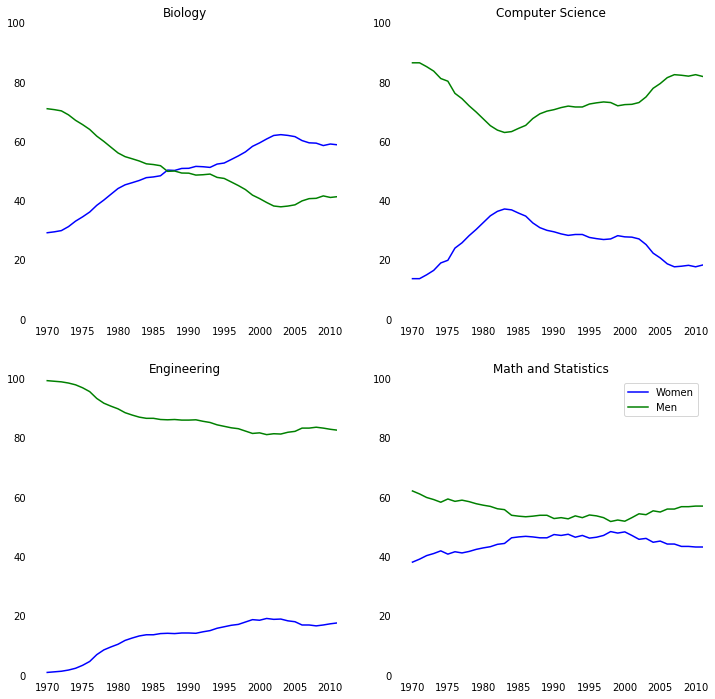

In [81]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    # Add your code here.

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

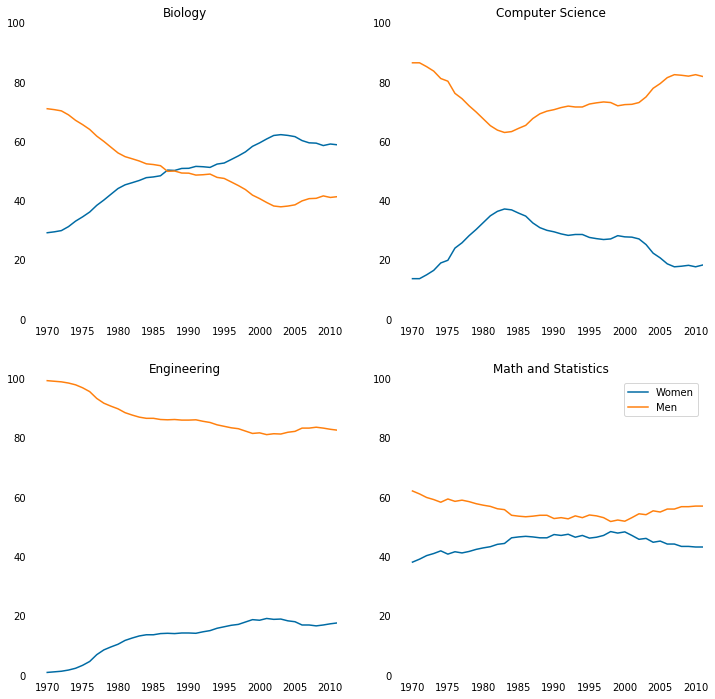

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']


cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

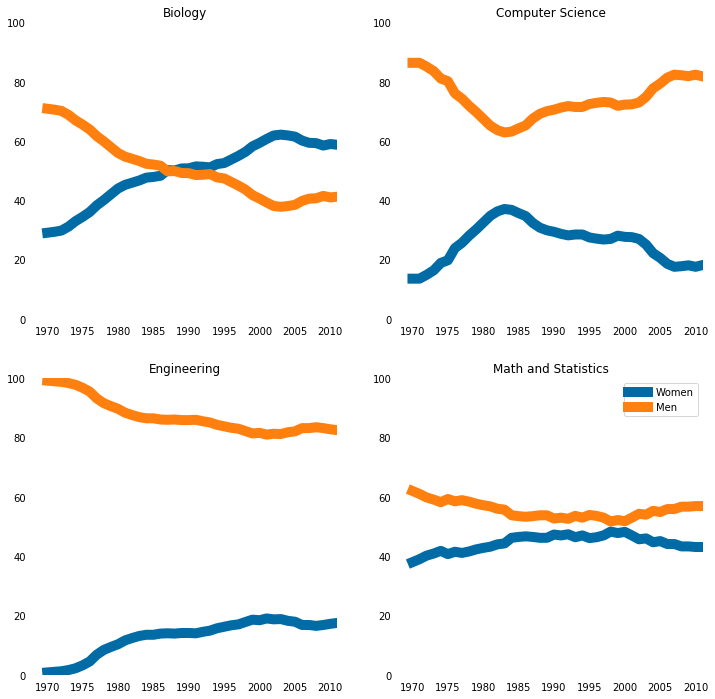

In [85]:
#Setting Line Width
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=10)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=10)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

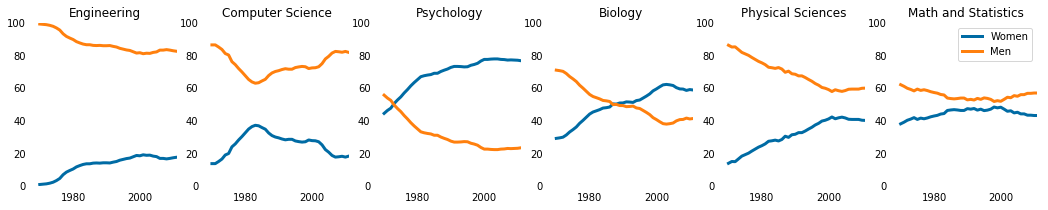

In [87]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

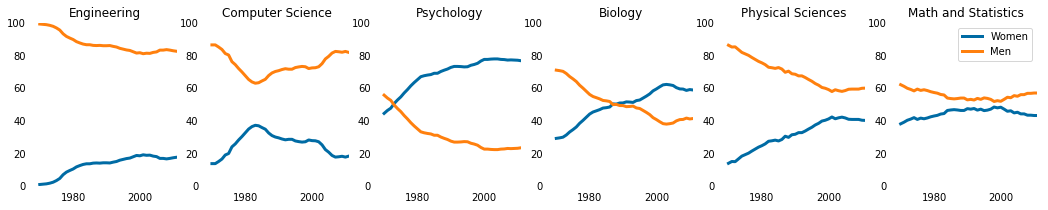

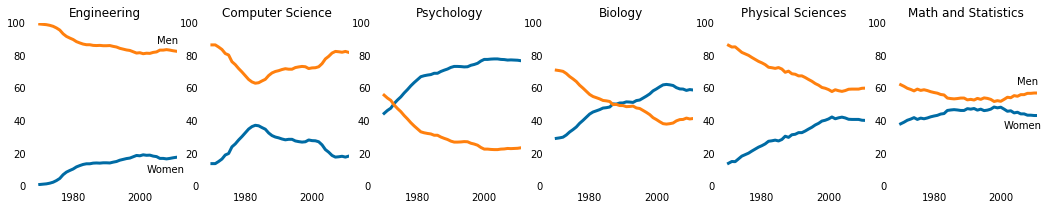

In [90]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.legend(loc='upper right')
plt.show()
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()